## Import packages and modules

In [42]:
from models.tda_models import TDA_PI34_Model, TDA_PI42_Model, VECTOR_STITCHING_PI_Model_34, VECTOR_STITCHING_PI_Model_42
from models.raw_models import Raw_Model, Dummy_Model
from models.combined_models import Combined_model
from tda_pipelines import *


## Fetch dataset, prepare training and testing sets, generate distorted sets

In [44]:
# fetch data, prepare for pipeline and test models

from sklearn.datasets import fetch_openml 
import numpy as np
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
print(f"X shape: {X.shape}, y shape: {y.shape}")
train_size, test_size = 1000, 100 # Reshape to (n_samples, n_pixels_x, n_pixels_y) 
X = X.reshape((-1, 28, 28)) 
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=train_size, test_size=test_size, stratify=y, random_state=666 ) 
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}") 
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


# mnist comes with string labels, we need to convert them to int
y_train = y_train.astype(int)
y_test = y_test.astype(int)


c:\Users\jawor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


X shape: (70000, 784), y shape: (70000,)
X_train shape: (1000, 28, 28), y_train shape: (1000,)
X_test shape: (100, 28, 28), y_test shape: (100,)


C:\Users\jawor\AppData\Local\Temp\ipykernel_13676\1520112787.py:5: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  X_train_noisy = random_noise(X_train, mode="s&p",amount=0.05, seed=666)
C:\Users\jawor\AppData\Local\Temp\ipykernel_13676\1520112787.py:6: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  X_test_noisy = random_noise(X_test, mode="s&p",amount=0.05, seed=666)


Text(0.5, 1.0, 'Noisy Image with Random Noise')

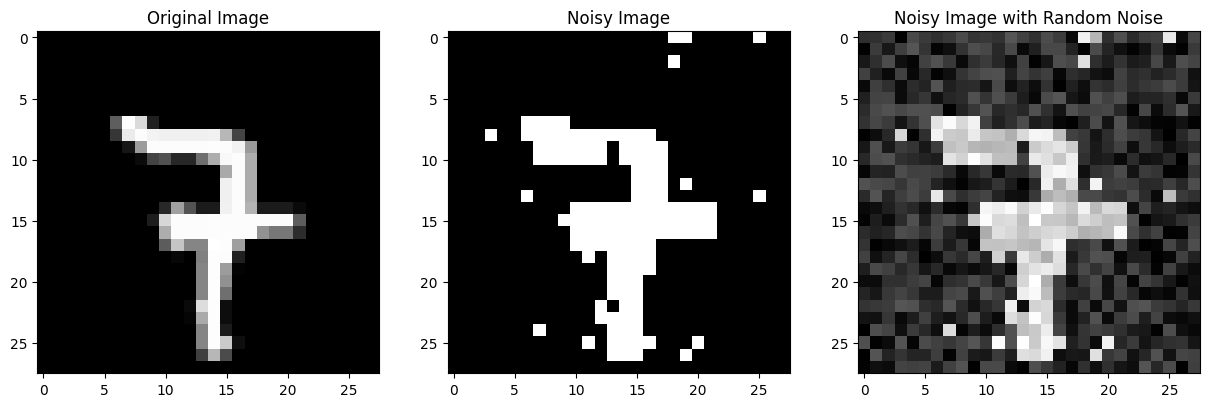

In [45]:
# distort X_train and X_test a little bit not using giotto
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.util import random_noise
X_train_noisy = random_noise(X_train, mode="s&p",amount=0.05, seed=666)
X_test_noisy = random_noise(X_test, mode="s&p",amount=0.05, seed=666)

# generate random noise matrix of size X_train_noisy.shape and X_test_noisy.shape but without original image

X_train_noisy_random = np.random.rand(*X_train_noisy.shape)
X_test_noisy_random = np.random.rand(*X_test_noisy.shape)

# for each image in X_train_noisy and X_test_noisy, we will add the random noise matrix to the image

X_train_noisy_random = X_train_noisy + X_train_noisy_random
X_test_noisy_random = X_test_noisy + 0.5*X_test_noisy_random

# plot the original image, the noisy image and the noisy image with random noise

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(X_test[5], cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(X_test_noisy[5], cmap="gray")
ax[1].set_title("Noisy Image")
ax[2].imshow(X_test_noisy_random[5], cmap="gray")
ax[2].set_title("Noisy Image with Random Noise")


## Load TDA and Vector-stitching pipelines 

In [46]:
# load pipelines 

tda_pipeline_34 = TDA_PI34_Pipeline()
tda_pipeline_42 = TDA_PI42_Pipeline()
vector_stitching_pipeline_34, tda_union_34 = VECTOR_STITCHING_PI_Pipeline_34()
vector_stitching_pipeline_42, tda_union_42 = VECTOR_STITCHING_PI_Pipeline_42()


## Transform raw data to persistance images and stitched RAW-PI images

In [47]:
# clean data

X_train_clean_tda_34 = tda_pipeline_34.fit_transform(X_train)
print("done")
X_test_clean_tda_34 = tda_pipeline_34.transform(X_test)
print("done")
X_train_clean_tda_42 = tda_pipeline_42.fit_transform(X_train)
print("done")
X_test_clean_tda_42 = tda_pipeline_42.transform(X_test)
print("done")

# distorted data
X_train_noisy_tda_34 = tda_pipeline_34.fit_transform(X_train_noisy_random)
print("done")
X_test_noisy_tda_34 = tda_pipeline_34.transform(X_test_noisy_random)
print("done")
X_train_noisy_tda_42 = tda_pipeline_42.fit_transform(X_train_noisy_random)
print("done")
X_test_noisy_tda_42 = tda_pipeline_42.transform(X_test_noisy_random)
print("done")


done
done
done
done
done
done
done
done


In [48]:

#important for initializing Binarizer
#X_training = tda_union.fit(X_train)

#clean data
X_train_clean_vector_stitching_34 = vector_stitching_pipeline_34.fit_transform(X_train)
print("done")
X_test_clean_vector_stitching_34 = vector_stitching_pipeline_34.transform(X_test)
print("done")
X_train_clean_vector_stitching_42 = vector_stitching_pipeline_42.fit_transform(X_train)
print("done")
X_test_clean_vector_stitching_42 = vector_stitching_pipeline_42.transform(X_test)
print("done")

# distorted data
X_train_noisy_vector_stitching_34 = vector_stitching_pipeline_34.fit_transform(X_train_noisy_random)
print("done")
X_test_noisy_vector_stitching_34 = vector_stitching_pipeline_34.transform(X_test_noisy_random)
print("done")
X_train_noisy_vector_stitching_42 = vector_stitching_pipeline_42.fit_transform(X_train_noisy_random)
print("done")
X_test_noisy_vector_stitching_42 = vector_stitching_pipeline_42.transform(X_test_noisy_random)
print("done")


done
done
done
done
done
done
done
done


In [49]:
# this needs to be integrated into pipeline, transposing the data to fit the input shape of the model

# normal tda
X_train_clean_tda_good_34 = np.transpose(X_train_clean_tda_34, (0, 3, 2, 1))
X_test_clean_tda_good_34 = np.transpose(X_test_clean_tda_34, (0, 3, 2, 1))

X_train_noisy_tda_good_34 = np.transpose(X_train_noisy_tda_34, (0, 3, 2, 1))
X_test_noisy_tda_good_34 = np.transpose(X_test_noisy_tda_34, (0, 3, 2, 1))

X_train_clean_tda_good_42 = np.transpose(X_train_clean_tda_42, (0, 3, 2, 1))
X_test_clean_tda_good_42 = np.transpose(X_test_clean_tda_42, (0, 3, 2, 1))

X_train_noisy_tda_good_42 = np.transpose(X_train_noisy_tda_42, (0, 3, 2, 1))
X_test_noisy_tda_good_42 = np.transpose(X_test_noisy_tda_42, (0, 3, 2, 1))

#stitched

X_train_clean_vector_stitching_good_34 = np.transpose(X_train_clean_vector_stitching_34, (0, 3, 2, 1))
X_test_clean_vector_stitching_good_34 = np.transpose(X_test_clean_vector_stitching_34, (0, 3, 2, 1))

X_train_noisy_vector_stitching_good_34 = np.transpose(X_train_noisy_vector_stitching_34, (0, 3, 2, 1))
X_test_noisy_vector_stitching_good_34 = np.transpose(X_test_noisy_vector_stitching_34, (0, 3, 2, 1))

X_train_clean_vector_stitching_good_42 = np.transpose(X_train_clean_vector_stitching_42, (0, 3, 2, 1))
X_test_clean_vector_stitching_good_42 = np.transpose(X_test_clean_vector_stitching_42, (0, 3, 2, 1))

X_train_noisy_vector_stitching_good_42 = np.transpose(X_train_noisy_vector_stitching_42, (0, 3, 2, 1))
X_test_noisy_vector_stitching_good_42 = np.transpose(X_test_noisy_vector_stitching_42, (0, 3, 2, 1))

# shapes
print(f"X_train_clean_tda_good shape: {X_train_clean_tda_good_34.shape}, X_test_clean_tda_good shape: {X_test_clean_tda_good_34.shape}")
print(f"X_train_noisy_tda_good shape: {X_train_noisy_tda_good_34.shape}, X_test_noisy_tda_good shape: {X_test_noisy_tda_good_34.shape}")
print(f"X_train_clean_vector_stitching_good shape: {X_train_clean_vector_stitching_good_34.shape}, X_test_clean_vector_stitching_good shape: {X_test_clean_vector_stitching_good_34.shape}")
print(f"X_train_noisy_vector_stitching_good shape: {X_train_noisy_vector_stitching_good_34.shape}, X_test_noisy_vector_stitching_good shape: {X_test_noisy_vector_stitching_good_34.shape}")

print(f"X_train_clean_tda_good shape: {X_train_clean_tda_good_42.shape}, X_test_clean_tda_good shape: {X_test_clean_tda_good_42.shape}")
print(f"X_train_noisy_tda_good shape: {X_train_noisy_tda_good_42.shape}, X_test_noisy_tda_good shape: {X_test_noisy_tda_good_42.shape}")
print(f"X_train_clean_vector_stitching_good shape: {X_train_clean_vector_stitching_good_42.shape}, X_test_clean_vector_stitching_good shape: {X_test_clean_vector_stitching_good_42.shape}")
print(f"X_train_noisy_vector_stitching_good shape: {X_train_noisy_vector_stitching_good_42.shape}, X_test_noisy_vector_stitching_good shape: {X_test_noisy_vector_stitching_good_42.shape}")



X_train_clean_tda_good shape: (1000, 28, 28, 34), X_test_clean_tda_good shape: (100, 28, 28, 34)
X_train_noisy_tda_good shape: (1000, 28, 28, 34), X_test_noisy_tda_good shape: (100, 28, 28, 34)
X_train_clean_vector_stitching_good shape: (1000, 56, 28, 34), X_test_clean_vector_stitching_good shape: (100, 56, 28, 34)
X_train_noisy_vector_stitching_good shape: (1000, 56, 28, 34), X_test_noisy_vector_stitching_good shape: (100, 56, 28, 34)
X_train_clean_tda_good shape: (1000, 28, 28, 42), X_test_clean_tda_good shape: (100, 28, 28, 42)
X_train_noisy_tda_good shape: (1000, 28, 28, 42), X_test_noisy_tda_good shape: (100, 28, 28, 42)
X_train_clean_vector_stitching_good shape: (1000, 56, 28, 42), X_test_clean_vector_stitching_good shape: (100, 56, 28, 42)
X_train_noisy_vector_stitching_good shape: (1000, 56, 28, 42), X_test_noisy_vector_stitching_good shape: (100, 56, 28, 42)


In [68]:
X_train_expanded, X_test_noisy_random_expanded, X_test_expanded = transform_data(X_train, X_test_noisy_random, X_test)
_, X_train_noisy_random_expanded, _ = transform_data(X_train, X_train_noisy_random, X_test)

## Prepare 90% clean and 10% distorted training and testing sets

In [79]:
from sklearn.utils import shuffle

# prepare 90% clean and 10% noisy data for training and testing
# X_tr_ should be clean raw data of 90% clean and 10% noisy

X_tr = np.concatenate((X_train_expanded, X_train_noisy_random_expanded[:100]), axis=0)
y_tr = np.concatenate((y_train, y_train[:100]), axis=0)
X_tr, y_tr = shuffle(X_tr, y_tr, random_state=666)

# the same for other data
X_tr_tda_34 = np.concatenate((X_train_clean_tda_good_34, X_train_noisy_tda_good_34[:100]), axis=0)
y_tr_tda_34 = np.concatenate((y_train, y_train[:100]), axis=0)
X_tr_tda_34, y_tr_tda_34 = shuffle(X_tr_tda_34, y_tr_tda_34, random_state=666)

X_tr_tda_42 = np.concatenate((X_train_clean_tda_good_42, X_train_noisy_tda_good_42[:100]), axis=0)
y_tr_tda_42 = np.concatenate((y_train, y_train[:100]), axis=0)
X_tr_tda_42, y_tr_tda_42 = shuffle(X_tr_tda_42, y_tr_tda_42, random_state=666)

X_tr_vector_stitching_34 = np.concatenate((X_train_clean_vector_stitching_good_34, X_train_noisy_vector_stitching_good_34[:100]), axis=0)
y_tr_vector_stitching_34 = np.concatenate((y_train, y_train[:100]), axis=0)
X_tr_vector_stitching_34, y_tr_vector_stitching_34 = shuffle(X_tr_vector_stitching_34, y_tr_vector_stitching_34, random_state=666)

X_tr_vector_stitching_42 = np.concatenate((X_train_clean_vector_stitching_good_42, X_train_noisy_vector_stitching_good_42[:100]), axis=0)
y_tr_vector_stitching_42 = np.concatenate((y_train, y_train[:100]), axis=0)
X_tr_vector_stitching_42, y_tr_vector_stitching_42 = shuffle(X_tr_vector_stitching_42, y_tr_vector_stitching_42, random_state=666)





# Initialize models

In [80]:
# models

raw_model = Raw_Model() # cnn models working on raw images
dummy_model = Dummy_Model() # fully dense model working on raw images
tda_model_34 = TDA_PI34_Model() # cnn model working on persistance images
tda_model_42 = TDA_PI42_Model() # cnn model working on persistance images
vector_stitching_model_34 = VECTOR_STITCHING_PI_Model_34() # cnn model working on stitched raw and PI images
vector_stitching_model_42 = VECTOR_STITCHING_PI_Model_42() # cnn model working on stitched raw and PI images


## Fitting and validating models

All models are trained on clean data, and then validated on only distorted data (look up 2nd paragraph to see plotted example images)

In [81]:
tf.keras.backend.clear_session()

In [82]:
#TDA model

tda_model_34.model.fit(X_tr_tda_34, y_tr_tda_34, epochs=20, batch_size=5, validation_data=(X_test_noisy_tda_good_34, y_test))

Epoch 1/20
220/220 [==============================] - 3s 8ms/step - loss: 1.5386 - accuracy: 0.5264 - val_loss: 1.8724 - val_accuracy: 0.3900
Epoch 2/20
220/220 [==============================] - 1s 6ms/step - loss: 0.6933 - accuracy: 0.7791 - val_loss: 1.4947 - val_accuracy: 0.5700
Epoch 3/20
220/220 [==============================] - 1s 7ms/step - loss: 0.4995 - accuracy: 0.8573 - val_loss: 1.1396 - val_accuracy: 0.6100
Epoch 4/20
220/220 [==============================] - 2s 7ms/step - loss: 0.3922 - accuracy: 0.8764 - val_loss: 1.3780 - val_accuracy: 0.6100
Epoch 5/20
220/220 [==============================] - 1s 7ms/step - loss: 0.3069 - accuracy: 0.9055 - val_loss: 2.0568 - val_accuracy: 0.5700
Epoch 6/20
220/220 [==============================] - 2s 7ms/step - loss: 0.3156 - accuracy: 0.9073 - val_loss: 1.7080 - val_accuracy: 0.5200
Epoch 7/20
220/220 [==============================] - 1s 7ms/step - loss: 0.2480 - accuracy: 0.9236 - val_loss: 0.9925 - val_accuracy: 0.7100
Epoch 

In [110]:
predictions_tda = tda_model_34.model.predict(X_test_noisy_tda_good_34)

score =0
for i,row in enumerate(predictions_tda):
    print(np.argmax(row), y_test[i])
    if np.argmax(row) == y_test[i]:
        score += 1

print(f"Accuracy: {score/len(predictions_tda)}")

4/4 [==============================] - 0s 7ms/step
9 9
0 0
3 3
5 5
7 7
7 7
4 4
3 1
1 1
3 3
7 7
8 8
1 8
0 6
2 2
4 4
6 6
1 1
0 0
8 8
6 6
1 0
1 1
3 3
0 0
8 9
9 4
5 5
4 4
3 5
0 0
9 9
5 3
1 1
2 3
8 9
0 0
5 5
0 0
0 7
2 2
8 7
8 9
8 1
3 3
2 2
5 5
5 5
2 1
6 6
4 4
9 9
3 3
8 9
1 8
6 8
4 4
5 9
1 8
3 3
7 7
2 2
8 1
9 9
0 0
2 2
5 5
7 7
8 8
8 5
0 0
6 6
1 1
9 6
4 4
7 7
0 0
6 6
9 9
1 2
2 2
5 5
1 1
7 4
6 6
9 3
6 6
2 2
6 8
8 8
4 4
6 6
2 2
3 3
8 8
7 7
7 7
1 1
8 4
2 2
Accuracy: 0.72


In [83]:
tf.keras.backend.clear_session()

In [84]:
tda_model_42.model.fit(X_tr_tda_42, y_tr_tda_42, epochs=20, batch_size=10, validation_data=(X_test_noisy_tda_good_42, y_test))

Epoch 1/20
110/110 [==============================] - 2s 12ms/step - loss: 1.9968 - accuracy: 0.3500 - val_loss: 2.0308 - val_accuracy: 0.2900
Epoch 2/20
110/110 [==============================] - 1s 8ms/step - loss: 1.0926 - accuracy: 0.6509 - val_loss: 2.1448 - val_accuracy: 0.3200
Epoch 3/20
110/110 [==============================] - 1s 8ms/step - loss: 0.7442 - accuracy: 0.7773 - val_loss: 1.6964 - val_accuracy: 0.3300
Epoch 4/20
110/110 [==============================] - 1s 8ms/step - loss: 0.5696 - accuracy: 0.8409 - val_loss: 1.7817 - val_accuracy: 0.4300
Epoch 5/20
110/110 [==============================] - 1s 8ms/step - loss: 0.4853 - accuracy: 0.8536 - val_loss: 1.2863 - val_accuracy: 0.5100
Epoch 6/20
110/110 [==============================] - 1s 8ms/step - loss: 0.3765 - accuracy: 0.8964 - val_loss: 1.3745 - val_accuracy: 0.4900
Epoch 7/20
110/110 [==============================] - 1s 9ms/step - loss: 0.3415 - accuracy: 0.8955 - val_loss: 1.8699 - val_accuracy: 0.4300
Epoch

In [85]:
tf.keras.backend.clear_session()

In [86]:
# RAW model
raw_model.model.fit(X_tr, y_tr, epochs=20, batch_size=5, validation_data=(X_test_noisy_random_expanded, y_test))

Epoch 1/20
220/220 [==============================] - 3s 6ms/step - loss: 3.2349 - accuracy: 0.4673 - val_loss: 2.2867 - val_accuracy: 0.3300
Epoch 2/20
220/220 [==============================] - 1s 6ms/step - loss: 0.7652 - accuracy: 0.7445 - val_loss: 2.2631 - val_accuracy: 0.4800
Epoch 3/20
220/220 [==============================] - 1s 6ms/step - loss: 0.5872 - accuracy: 0.8264 - val_loss: 2.2394 - val_accuracy: 0.4100
Epoch 4/20
220/220 [==============================] - 1s 6ms/step - loss: 0.4304 - accuracy: 0.8682 - val_loss: 2.1836 - val_accuracy: 0.3600
Epoch 5/20
220/220 [==============================] - 1s 6ms/step - loss: 0.3784 - accuracy: 0.8909 - val_loss: 2.1623 - val_accuracy: 0.3000
Epoch 6/20
220/220 [==============================] - 1s 7ms/step - loss: 0.3327 - accuracy: 0.9064 - val_loss: 2.1006 - val_accuracy: 0.3100
Epoch 7/20
220/220 [==============================] - 1s 7ms/step - loss: 0.3086 - accuracy: 0.9136 - val_loss: 2.0036 - val_accuracy: 0.6700
Epoch 

In [111]:
predictions_raw = raw_model.model.predict(X_test_noisy_random_expanded)

scoreraw=0

for i,row in enumerate(predictions_raw):
    print(np.argmax(row), y_test[i])
    if np.argmax(row) == y_test[i]:
        scoreraw += 1

print(f"Accuracy: {scoreraw/len(predictions_raw)}")


4/4 [==============================] - 0s 4ms/step
7 9
0 0
3 3
5 5
7 7
7 7
4 4
1 1
1 1
3 3
7 7
3 8
8 8
6 6
2 2
4 4
6 6
1 1
0 0
8 8
6 6
0 0
1 1
3 3
5 0
9 9
8 4
5 5
4 4
5 5
0 0
7 9
3 3
1 1
3 3
4 9
0 0
3 5
0 0
7 7
2 2
7 7
9 9
1 1
3 3
2 2
5 5
5 5
1 1
6 6
9 4
9 9
3 3
7 9
8 8
1 8
4 4
3 9
1 8
3 3
7 7
2 2
1 1
1 9
0 0
1 2
7 5
7 7
8 8
5 5
0 0
2 6
1 1
5 6
4 4
7 7
0 0
6 6
9 9
2 2
2 2
3 5
1 1
1 4
6 6
2 3
8 6
2 2
8 8
8 8
4 4
6 6
2 2
3 3
8 8
7 7
7 7
1 1
1 4
2 2
Accuracy: 0.78


In [115]:
i=0
combined_score = 0
for row_tda, row_raw in zip(predictions_tda, predictions_raw):
    # multiply rows elementwise 
    combined = row_tda * row_raw
    if np.argmax(combined) == y_test[i]:
        combined_score += 1
    print("tda: ",np.argmax(row_tda),"    raw: ", np.argmax(row_raw), "    combined: ", np.argmax(combined), "    actual: ", y_test[i]) 
    i+=1

print(f"Combined Accuracy: {combined_score/len(predictions_tda)}")

tda:  9     raw:  7     combined:  7     actual:  9
tda:  0     raw:  0     combined:  0     actual:  0
tda:  3     raw:  3     combined:  3     actual:  3
tda:  5     raw:  5     combined:  5     actual:  5
tda:  7     raw:  7     combined:  7     actual:  7
tda:  7     raw:  7     combined:  7     actual:  7
tda:  4     raw:  4     combined:  4     actual:  4
tda:  3     raw:  1     combined:  1     actual:  1
tda:  1     raw:  1     combined:  1     actual:  1
tda:  3     raw:  3     combined:  3     actual:  3
tda:  7     raw:  7     combined:  7     actual:  7
tda:  8     raw:  3     combined:  8     actual:  8
tda:  1     raw:  8     combined:  1     actual:  8
tda:  0     raw:  6     combined:  6     actual:  6
tda:  2     raw:  2     combined:  2     actual:  2
tda:  4     raw:  4     combined:  4     actual:  4
tda:  6     raw:  6     combined:  6     actual:  6
tda:  1     raw:  1     combined:  1     actual:  1
tda:  0     raw:  0     combined:  0     actual:  0
tda:  8     

In [87]:
tf.keras.backend.clear_session()

In [88]:
#Vector stitching model

vector_stitching_model_34.model.fit(X_tr_vector_stitching_34, y_tr_vector_stitching_34, epochs=20, batch_size=5, validation_data=(X_test_noisy_vector_stitching_good_34, y_test))

Epoch 1/20
220/220 [==============================] - 4s 11ms/step - loss: 1.2930 - accuracy: 0.5845 - val_loss: 1.7986 - val_accuracy: 0.5800
Epoch 2/20
220/220 [==============================] - 2s 9ms/step - loss: 0.5281 - accuracy: 0.8518 - val_loss: 0.9013 - val_accuracy: 0.7600
Epoch 3/20
220/220 [==============================] - 2s 8ms/step - loss: 0.3569 - accuracy: 0.8891 - val_loss: 1.0845 - val_accuracy: 0.7500
Epoch 4/20
220/220 [==============================] - 2s 9ms/step - loss: 0.2412 - accuracy: 0.9336 - val_loss: 1.5040 - val_accuracy: 0.7400
Epoch 5/20
220/220 [==============================] - 2s 8ms/step - loss: 0.1857 - accuracy: 0.9391 - val_loss: 2.1928 - val_accuracy: 0.6700
Epoch 6/20
220/220 [==============================] - 2s 9ms/step - loss: 0.1928 - accuracy: 0.9436 - val_loss: 1.2407 - val_accuracy: 0.7700
Epoch 7/20
220/220 [==============================] - 2s 10ms/step - loss: 0.1523 - accuracy: 0.9527 - val_loss: 1.0901 - val_accuracy: 0.8100
Epoc

In [65]:
tf.keras.backend.clear_session()

In [89]:
vector_stitching_model_42.model.fit(X_tr_vector_stitching_42, y_tr_vector_stitching_42, epochs=20, batch_size=10, validation_data=(X_test_noisy_vector_stitching_good_42, y_test))

Epoch 1/20
110/110 [==============================] - 4s 22ms/step - loss: 1.6972 - accuracy: 0.4491 - val_loss: 1.7502 - val_accuracy: 0.5600
Epoch 2/20
110/110 [==============================] - 2s 22ms/step - loss: 0.6391 - accuracy: 0.7991 - val_loss: 1.0982 - val_accuracy: 0.7400
Epoch 3/20
110/110 [==============================] - 2s 19ms/step - loss: 0.4286 - accuracy: 0.8682 - val_loss: 1.1156 - val_accuracy: 0.7600
Epoch 4/20
110/110 [==============================] - 2s 18ms/step - loss: 0.3387 - accuracy: 0.8982 - val_loss: 0.8829 - val_accuracy: 0.8100
Epoch 5/20
110/110 [==============================] - 2s 23ms/step - loss: 0.2116 - accuracy: 0.9245 - val_loss: 0.8066 - val_accuracy: 0.7800
Epoch 6/20
110/110 [==============================] - 2s 17ms/step - loss: 0.1489 - accuracy: 0.9527 - val_loss: 1.5682 - val_accuracy: 0.7500
Epoch 7/20
110/110 [==============================] - 2s 18ms/step - loss: 0.1280 - accuracy: 0.9609 - val_loss: 0.9350 - val_accuracy: 0.8200